# Import Basic libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [38]:
file_path = r'S:\Projects\Capstone Projects\Skin Disorder\dataset_35_dermatology (1).csv'

data = pd.read_csv(file_path)

In [39]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


# Convert 'Age' column object to numeric 

In [40]:

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [42]:

# Fill missing values in the "Age" column with the mean
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)


# Check if there are still any missing values in the dataset
print(data.isnull().sum())

# Print the first few rows of the cleaned DataFrame
print(data.head())


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [43]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

# Feature Selection based on Correlation and Importance

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Compute the correlation matrix
corr_matrix = data.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set correlation threshold for removal (adjust as needed)
threshold = 0.8

# Find features with correlation above or below threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold) or any(upper[column] < -threshold)]

# Drop features with high correlation from the dataframe
data_filtered = data.drop(to_drop, axis=1)

# Separate features and target
X = data_filtered.drop('class', axis=1)
y = data_filtered['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the filtered data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance from the trained model
feature_importance = clf.feature_importances_

# Select features based on importance (optional)
sfm = SelectFromModel(clf, threshold='median')
X_selected = sfm.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices].tolist()
print("Selected features:", selected_features)


Accuracy: 0.96
Selected features: ['definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'scalp_involvement', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'munro_microabcess', 'spongiosis', 'Age']


In [45]:
data_selected = data[selected_features + ['class']]

In [46]:
data_selected.columns

Index(['definite_borders', 'itching', 'koebner_phenomenon',
       'polygonal_papules', 'scalp_involvement', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis',
       'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges',
       'munro_microabcess', 'spongiosis', 'Age', 'class'],
      dtype='object')

# remove features that have correlations above 0.8 or below -0.8

# defing Independent variables as x and Dependent variable(Target variable ) as y

In [47]:
X = data_selected.drop('class', axis=1)

In [48]:
X

,definite_borders,itching,koebner_phenomenon,polygonal_papules,scalp_involvement,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,munro_microabcess,spongiosis,Age
0,0,3,0,0,0,0,0,3,0,0,0,3,55.0
1,3,2,1,0,1,1,0,1,2,2,1,0,8.0
2,2,3,1,3,0,0,0,1,0,0,0,3,26.0
3,2,0,0,0,2,3,0,0,2,2,0,0,40.0
4,2,2,2,2,0,0,0,1,0,0,0,2,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0,1,0,0,1,0,1,0,0,0,1,25.0
362,1,0,1,0,0,0,0,2,0,0,0,1,36.0
363,2,2,3,2,0,0,0,3,0,0,0,0,28.0
364,3,1,2,3,0,0,0,3,0,0,0,0,50.0


In [49]:
y = data_selected['class']

In [50]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

# Imbalanced Class Detection

In [51]:

class_distribution = y.value_counts(normalize=True)
print(class_distribution)


class
1    0.306011
3    0.196721
2    0.166667
5    0.142077
4    0.133880
6    0.054645
Name: proportion, dtype: float64


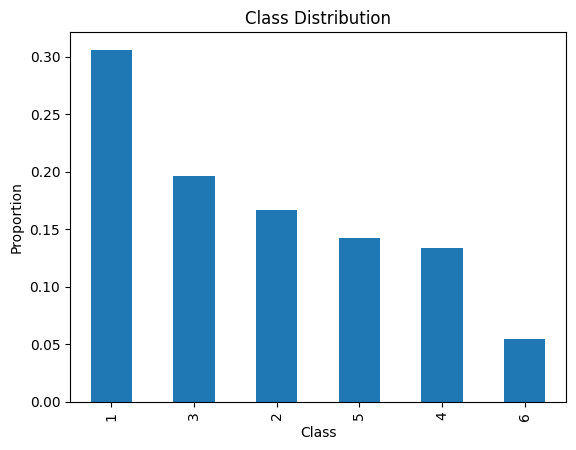

In [52]:
# Visualize Class Distribution:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

### imbalance data analysis
- The imbalance in the target variable "class" is evident, as Class 1 dominates the dataset with a high percentage.
- Class 6 minority classes, which could pose challenges during model training, especially for algorithms sensitive to class imbalance.

# Handling Imbalanced data

In [56]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X, y)

# Convert the oversampled data back to a DataFrame if needed
X_smote = pd.DataFrame(X_smote, columns=X.columns)  

# Now X_smote and y_smote contain the oversampled data


In [57]:
X_smote

,definite_borders,itching,koebner_phenomenon,polygonal_papules,scalp_involvement,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,munro_microabcess,spongiosis,Age
0,0,3,0,0,0,0,0,3,0,0,0,3,55.0
1,3,2,1,0,1,1,0,1,2,2,1,0,8.0
2,2,3,1,3,0,0,0,1,0,0,0,3,26.0
3,2,0,0,0,2,3,0,0,2,2,0,0,40.0
4,2,2,2,2,0,0,0,1,0,0,0,2,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1,0,0,0,0,0,0,3,0,0,0,3,7.0
668,1,0,0,0,0,0,0,3,0,0,0,3,7.0
669,2,0,0,0,0,0,0,2,0,0,0,1,9.0
670,1,0,0,0,0,0,0,3,0,0,0,2,16.0


In [58]:

class_distribution = y_smote.value_counts(normalize=True)
print(class_distribution)

class
2    0.166667
1    0.166667
3    0.166667
5    0.166667
4    0.166667
6    0.166667
Name: proportion, dtype: float64


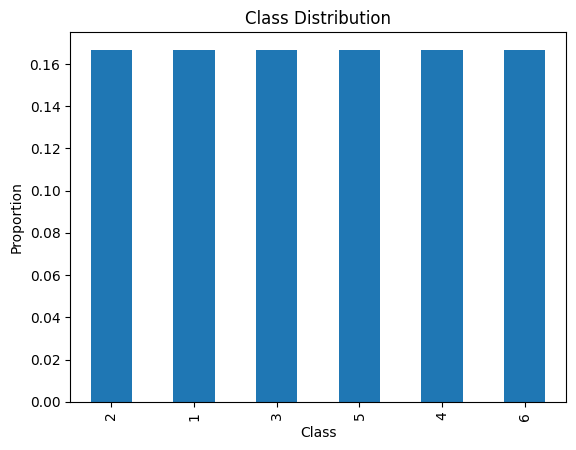

In [59]:
#Visualize Class Distribution: after balancing the data
class_distribution_balanced = y_smote.value_counts(normalize=True)
class_distribution_balanced.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()